In [70]:
participant_id = "P1"

I0000 00:00:1745870173.255107   46951 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1745870173.271404  166249 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745870173.316297  166249 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [71]:
%load_ext autoreload
%autoreload 2
from hireverse.utils.utils import *

video_file_path = os.path.join(BASE_DIR, "data/raw/videos", f"{participant_id}.avi")
print(video_file_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/bassel27/personal_projects/hireverse/data/raw/videos/P1.avi


In [ ]:
from hireverse.utils.face_analyzer import FaceAnalyzer
from hireverse.schemas.frame import Frame
import numpy as np

face_analyzer = FaceAnalyzer()
frames = face_analyzer.get_video_frames(participant_id="randomId",video_path= video_file_path, target_fps=20)

In [73]:
filtered_frames: List[Frame] = []
for frame in frames:
    frame.facial_landmarks_obj = face_analyzer.process_image_results(frame.image)
    if frame.facial_landmarks_obj:
        frame.facial_landmarks = frame.facial_landmarks_obj.landmark
        filtered_frames.append(frame)

frames = filtered_frames

In [74]:
for frame in frames:
    new_width = 640
    height, width = frame.image.shape[:2]
    if width != new_width:
        frame.resize(new_width=new_width)

In [75]:
for frame in frames:
    frame.align_face_with_mediapipe_landmarks()

In [76]:
for frame in frames:
    frame.face = face_analyzer.get_face_coordinates(frame.facial_landmarks, frame.image)
    x, y, w, h = frame.face
    # frame.crop_frame(x, y, x + w, y+h)

I0000 00:00:1745870229.420315   46951 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 88), renderer: Apple M1
W0000 00:00:1745870229.424208  167093 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745870229.431396  167093 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [77]:
import cv2

for frame in frames:
    frame.image =  cv2.cvtColor(frame.image, cv2.COLOR_BGR2GRAY)

In [78]:
for frame in frames:
    frame.image = np.clip(frame.image.astype('float32') / 255.0, 0.0, 1.0)

In [79]:
for frame in frames:
    frame.resize(new_width=640, new_height=640)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


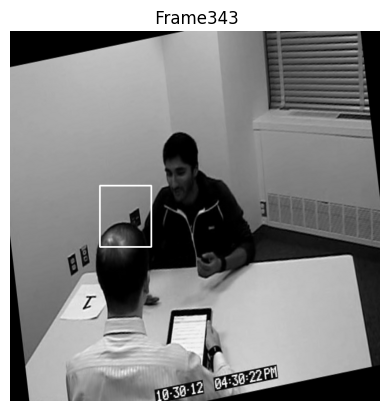

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


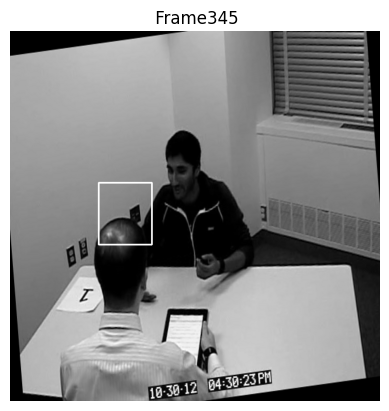

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


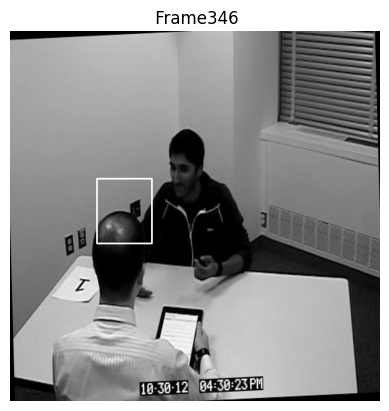

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


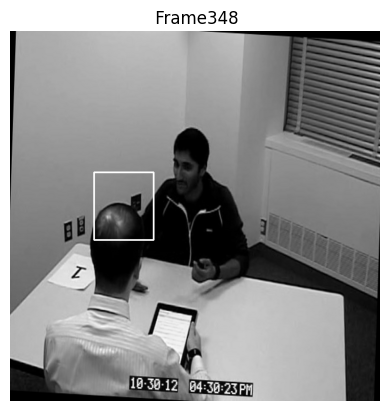

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


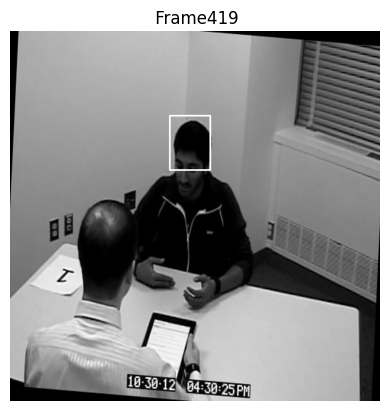

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


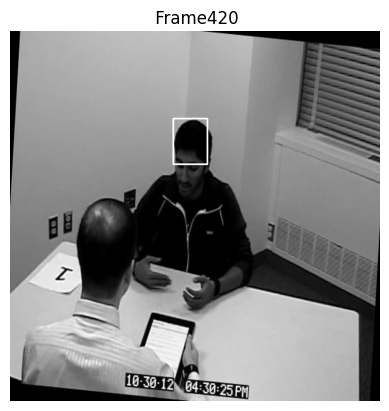

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


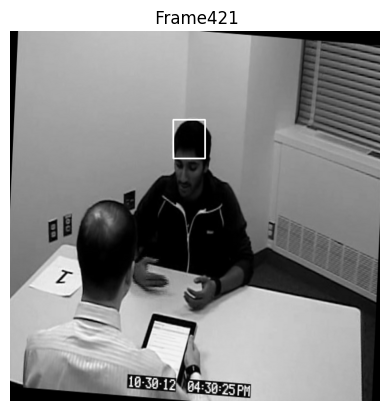

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


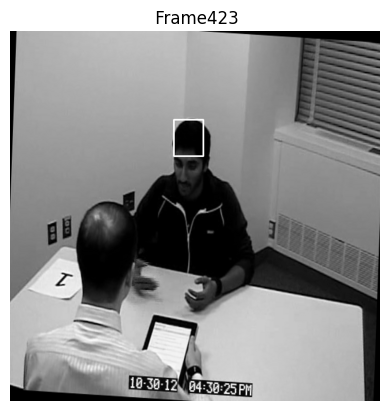

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


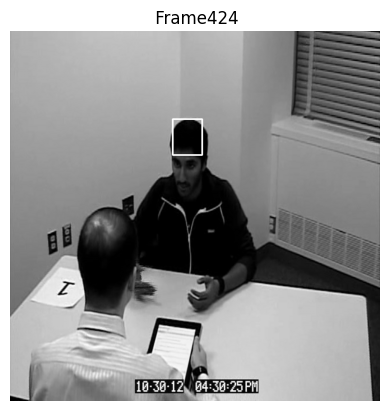

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


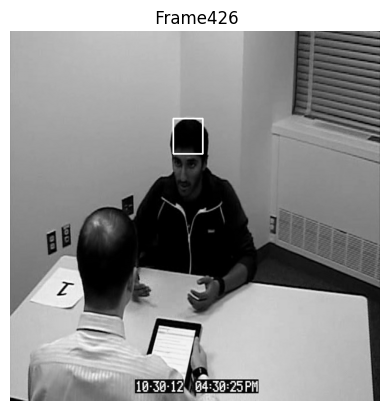

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


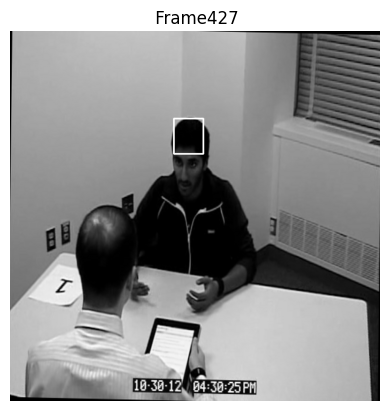

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


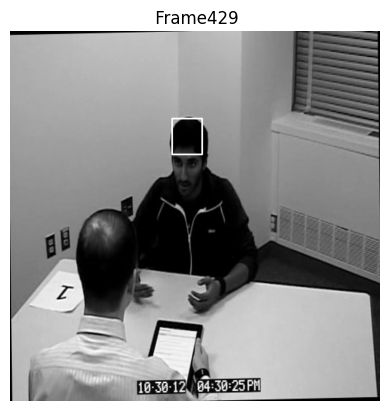

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


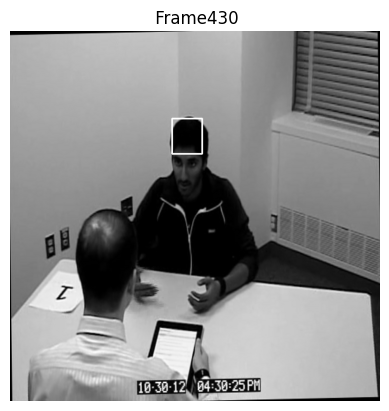

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


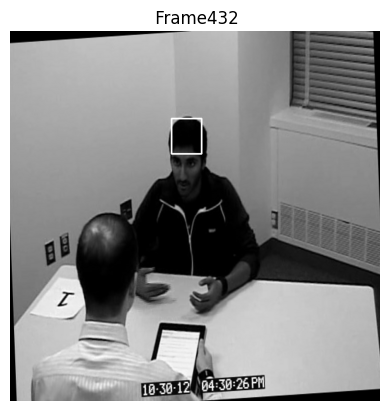

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


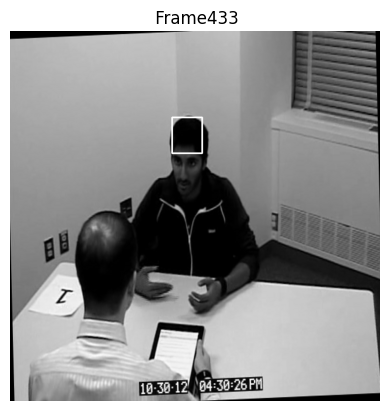

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


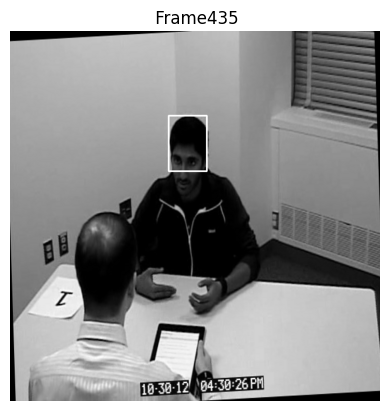

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


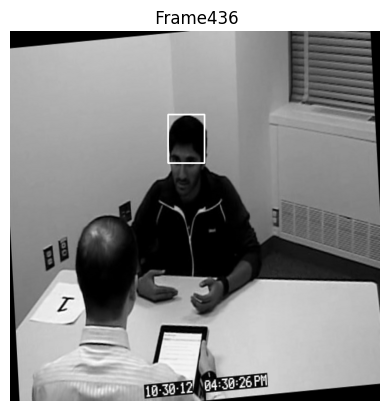

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


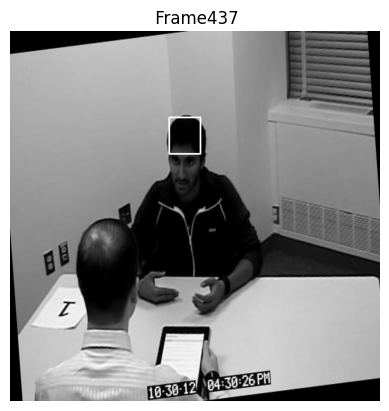

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


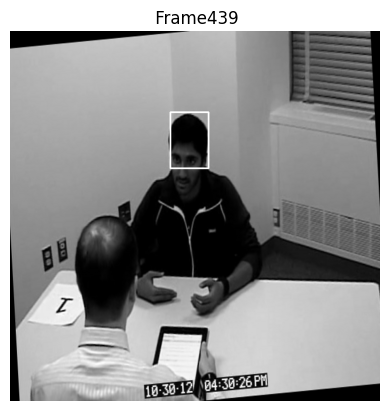

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


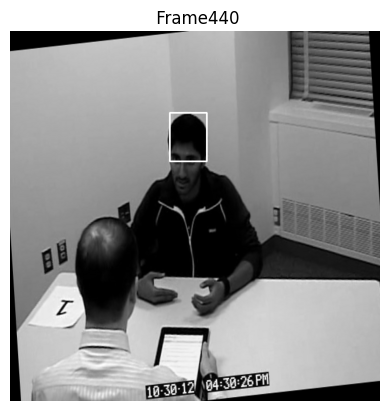

In [80]:
import numpy as np


for frame in frames[:20]:
    frame.reset_drawable_image()
    frame.draw_face_border()
    # frame.draw_facial_landmarks()
    # if frame.facial_landmarks:
    #     frame.draw_circle_at_facial_landmark(frame.facial_landmarks[10], frame.facial_landmarks[152])
    frame.display()